### Regresión

#### Regresión Lineal Simple

In [23]:
import pandas as pd

df = pd.read_csv("../datasets/Salary_Data.csv")
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [25]:
# Caracteristicas o variables independientes
X = df[['YearsExperience']].values

# Variable dependiente u objetivo
y = df.Salary

In [27]:
from sklearn.model_selection import train_test_split

# separación de los datos en conjuntos de entrenamiento y pruebas
X_entren, X_prueba, y_entren, y_prueba = train_test_split(X, y, test_size=0.20, random_state=0)

In [29]:
X_entren.shape, X_prueba.shape, y_entren.shape, y_prueba.shape

((24, 1), (6, 1), (24,), (6,))

In [31]:
from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()
reg_lin.fit(X, y)

LinearRegression()

In [33]:
predicciones = reg_lin.predict(X_prueba)
predicciones

array([ 39967.14368085, 123126.81210966,  64537.04571663,  62647.05325234,
       115566.84225249, 108006.87239533])

In [35]:
print("wo:", format(reg_lin.intercept_,".2f"))
print("w1:",format(reg_lin.coef_[0],".2f"))

wo: 25792.20
w1: 9449.96


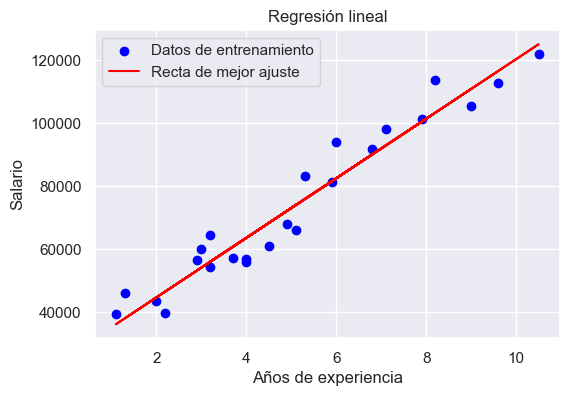

In [421]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(X_entren, y_entren, color='blue', label='Datos de entrenamiento')
plt.plot(X_entren, reg_lin.predict(X_entren), color='red', label='Recta de mejor ajuste')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.title('Regresión lineal')
plt.legend()

##### Métricas de evaluación

In [40]:
# Error absoluto medio
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_prueba, predicciones)
print(f'El Error absoluto medio es: {round(mae, 2)}')

El Error absoluto medio es: 2304.21


In [42]:
#Error cuadrático medio
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_prueba, predicciones)
print(f'El Error cuadrático medio es: {round(mse, 2)}')

El Error cuadrático medio es: 10909090.29


In [44]:
from sklearn.metrics import  r2_score
exactitud = r2_score(y_prueba, predicciones)
print(f'La exactitud es: {round(exactitud, 2)}')

La exactitud es: 0.99


#### Regresión lineal múltiple

In [380]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [382]:
# Leer archivo CSV
df = pd.read_csv("../datasets/insurance.csv")
df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


In [384]:
# codificamos la variable sex
d1 = {'male': 1, 'female':0}
df['sex'] = df['sex'].map(d1)

In [386]:
# codificamos la variable smoker
d2 = {'yes': 1, 'no':0}
df['smoker'] = df['smoker'].map(d2)

In [388]:
# codificamos la variable region
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [390]:
# eliminamos la columna index
df.drop(columns='index', inplace=True)

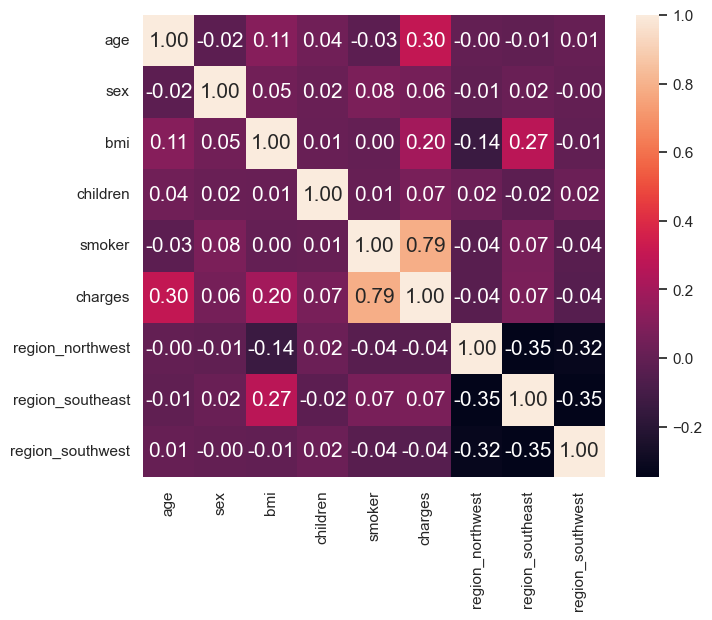

In [392]:
import seaborn as sb
import matplotlib.pyplot as pl
cm = np.corrcoef(df.values.astype(np.float64).T)
sb.set(rc = {'figure.figsize':(10,8)})
pl.figure(figsize=(8,6))
hm = sb.heatmap(cm, cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=df.columns,
                xticklabels=df.columns
                )
pl.show(7,7)

In [393]:
# obtenemos age, bmi y smoker
X = df.iloc[:,[0,2,4]]
y = df.iloc[:,5]

In [396]:
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.2, random_state=1)

In [398]:
reg = LinearRegression()
reg.fit(X_ent, y_ent)

LinearRegression()

In [400]:
y_pred = reg.predict(X_pru)

In [402]:
exactitud = r2_score(y_pru, y_pred)
print(f'La exactitud es: {round(exactitud, 2)}')

La exactitud es: 0.76


In [404]:
prueba = np.array([[36, 27, 0]])
print("El cobro del seguro es: ", round(reg.predict(prueba)[0],2))

El cobro del seguro es:  6460.92


C:\Users\Carlos Pineda\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Regresión polinómica

In [260]:
df = pd.read_csv("../datasets/auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [262]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

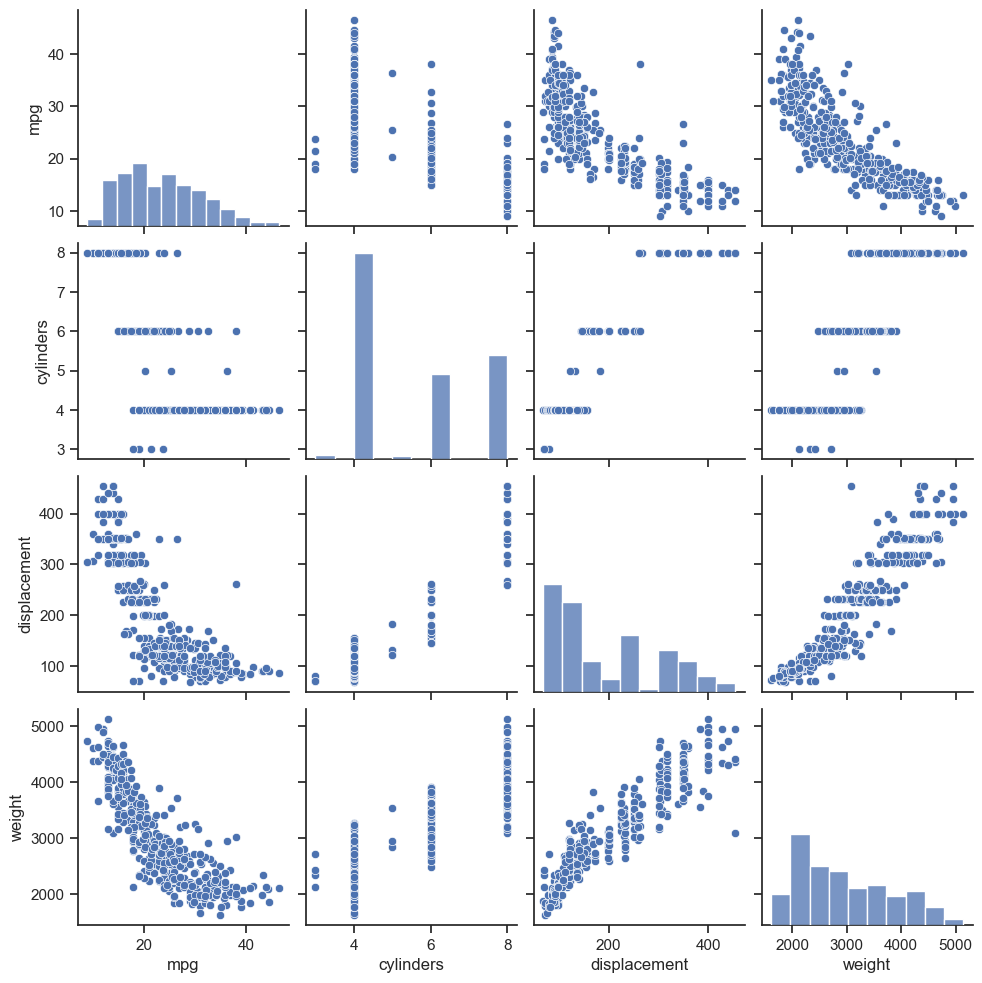

In [264]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(data=df,vars=['mpg', 'cylinders', 'displacement', 'weight'])

In [265]:
# Escogemos la variable predictora displacement
X=df[['displacement']].values

# Escogemos la variable objetivo mpg
y=df['mpg'].values

In [268]:
from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(X,y, test_size=0.2, random_state=20)

In [270]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polinomio = PolynomialFeatures(degree=2)
X_ent_transformado = polinomio.fit_transform(X_ent)
X_ent_transformado

array([[1.00000e+00, 4.29000e+02, 1.84041e+05],
       [1.00000e+00, 9.10000e+01, 8.28100e+03],
       [1.00000e+00, 4.00000e+02, 1.60000e+05],
       [1.00000e+00, 1.45000e+02, 2.10250e+04],
       [1.00000e+00, 6.80000e+01, 4.62400e+03],
       [1.00000e+00, 1.46000e+02, 2.13160e+04],
       [1.00000e+00, 4.00000e+02, 1.60000e+05],
       [1.00000e+00, 3.18000e+02, 1.01124e+05],
       [1.00000e+00, 3.07000e+02, 9.42490e+04],
       [1.00000e+00, 3.18000e+02, 1.01124e+05],
       [1.00000e+00, 2.62000e+02, 6.86440e+04],
       [1.00000e+00, 2.50000e+02, 6.25000e+04],
       [1.00000e+00, 9.80000e+01, 9.60400e+03],
       [1.00000e+00, 1.20000e+02, 1.44000e+04],
       [1.00000e+00, 8.50000e+01, 7.22500e+03],
       [1.00000e+00, 9.10000e+01, 8.28100e+03],
       [1.00000e+00, 9.70000e+01, 9.40900e+03],
       [1.00000e+00, 1.40000e+02, 1.96000e+04],
       [1.00000e+00, 1.08000e+02, 1.16640e+04],
       [1.00000e+00, 1.21000e+02, 1.46410e+04],
       [1.00000e+00, 2.50000e+02, 6.2500

In [272]:
reg_pol = LinearRegression()
reg_pol.fit(X_ent_transformado, y_ent)
# The coefficients
print ('Coeficientes: ', reg_pol.coef_)
print ('Intercepto: ',reg_pol.intercept_)

Coeficientes:  [ 0.         -0.13534041  0.0001664 ]
Intercepto:  41.44930949555906


Text(0, 0.5, 'MPG')

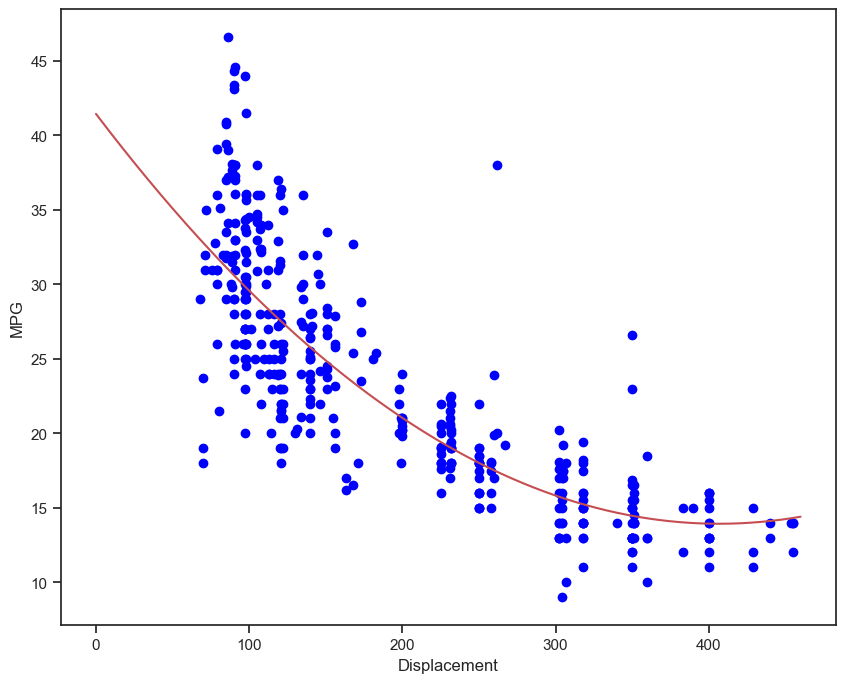

In [274]:
import matplotlib.pyplot as plt
plt.scatter(X, y,  color='blue')
XX = np.arange(0.0, 460, 0.1)
yy = reg_pol.intercept_+ reg_pol.coef_[1]*XX+ reg_pol.coef_[2]*XX*XX
plt.plot(XX, yy, '-r')
plt.xlabel("Displacement")
plt.ylabel("MPG")

In [276]:
#Modelo de regresion lineal
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
reg_lineal = LinearRegression()
reg_lineal.fit(X_ent,y_ent)

y_pred = reg_lineal.predict(X_pru)

print('MAE: %.3f '% mean_absolute_error(y_pru, y_pred))
print('MSE: %.3f'% mean_squared_error(y_pru, y_pred))
print('R2: %.3f'% r2_score(y_pru, y_pred))

MAE: 4.036 
MSE: 25.102
R2: 0.632


In [278]:
#Modelo de regresion polinómica
pru_X_polin = polinomio.fit_transform(X_pru)
y_pred = reg_pol.predict(pru_X_polin)

print('MAE: %.3f' % mean_absolute_error(y_pru, y_pred))
print('MSE: %.3f' % mean_squared_error(y_pru, y_pred))
print('R2: %.3f'% r2_score(y_pru, y_pred, ))

MAE: 3.479
MSE: 20.945
R2: 0.693
